In [1]:
# Decorations
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import gmplot
import scipy.stats as stats
#from config import api_key

In [2]:
# Import database
df1 = pd.read_csv('Data/housing.csv')
df2 = pd.read_csv('Data/Total.csv')
df1 = df1.dropna()

### df1(1990) Analysis

Sort and slice data to get top and bottom 5%

In [3]:
# SSort data by house value
df1 = df1.sort_values('median_house_value', ascending=False).reset_index(drop=True)
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
1,-117.66,33.48,22,809,180.0,334,157,2.3846,500001,<1H OCEAN
2,-118.50,33.97,29,2737,808.0,1157,696,5.1280,500001,<1H OCEAN
3,-122.47,37.73,50,1653,252.0,641,224,10.6605,500001,NEAR OCEAN
4,-122.47,37.73,52,2151,280.0,762,274,10.7309,500001,NEAR OCEAN


In [4]:
# Slice the top 5%
top5 = df1.iloc[:round(len(df1['median_house_value'])*0.05), :].sort_values('median_house_value', ascending=False)
top5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.42,34.08,48,2413,261.0,770,248,15.0001,500001,<1H OCEAN
644,-118.56,34.25,31,1962,243.0,697,242,8.5650,500001,<1H OCEAN
632,-118.56,34.24,23,2980,362.0,1208,378,8.1714,500001,<1H OCEAN
633,-118.41,34.07,52,3562,394.0,1163,361,15.0001,500001,<1H OCEAN
634,-118.41,34.07,52,1202,142.0,408,138,15.0001,500001,<1H OCEAN


In [5]:
# slice the bottom 5%
bottom5 = df1.iloc[round(len(df1['median_house_value'])*0.95): len(df1['median_house_value']),:].sort_values('median_house_value', ascending=True)
bottom5.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20432,-122.74,39.71,16,255,73.0,85,38,1.6607,14999,INLAND
20429,-117.86,34.24,52,803,267.0,628,225,4.1932,14999,INLAND
20431,-123.17,40.31,36,98,28.0,18,8,0.5360,14999,INLAND
20430,-117.02,36.40,19,619,239.0,490,164,2.1000,14999,INLAND
20428,-118.33,34.15,39,493,168.0,259,138,2.3667,17500,<1H OCEAN


Plotting Top 5% and Bottom 5% on gmap (Use gmplot package)

In [6]:
# Set the center of the map
gmap = gmplot.GoogleMapPlotter(top5['latitude'].median(),
                                   top5['longitude'].median(), 100000)
# Plot scatter points based on LatLng
gmap.scatter(top5['latitude'], top5['longitude'], '#FF0000', 
                              size = 2000, marker = False ) 
gmap.scatter(bottom5['latitude'], bottom5['longitude'], '#110870', 
                              size = 2000, marker = False ) 
# Draw out to 'Plot' folder in html format
gmap.draw("Plot/gmap.html")

Based on the plot, we can assume that the median house value is heavliy influenced by their location.

Now we clean our data and create a new dataframe with informations we need

First, we look at the relationship between income and house value

Text(0.5,1,'House Value vs. Income')

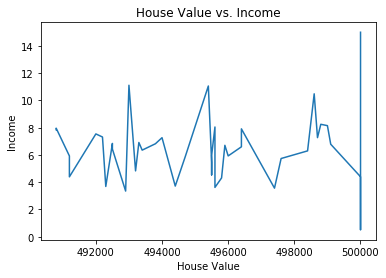

In [7]:
plt.plot(top5['median_house_value'], top5['median_income'])
plt.xlabel('House Value')
plt.ylabel('Income')
plt.title('House Value vs. Income')

Above plot shows that there's no visible correlation between income and house value, since there's no specifice trending (increase nor decrease) in house value as income increase. Rather, we can see that people with lower income(for example, for income=2) live in more expensive houses. 

It is also possible that number of rooms/bedrooms are related to house value

TypeError: nan is not a string

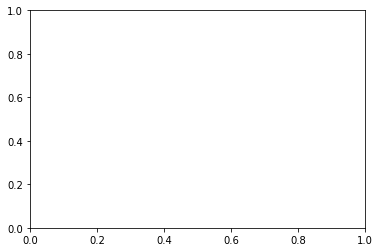

In [8]:
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
group_names = ["<1k", "1k-2k", "2k-3k", "3k-4k", "4k-5k", "5k-6k", ">6k"]
top5["population_groups"] = pd.cut(top5['population'], bins, labels=group_names)

plt.plot(top5['median_house_value'], top5['population_groups'])
plt.xlabel('House Value')
plt.ylabel('Poulation')
plt.title('House Value vs. Population')

## Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = df1.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("Plot/all_NOP.png")
plt.show()

The process shows that people totally in 1990 preferred to live near the ocean.

## Top 5 Percent Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = top5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='b', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Top Five Percent")
plt.savefig("Plot/Top5_NOP.png")
plt.show()

## Bottom 5 Percent Ocean Proximity vs Count of Houses

In [ ]:
x_axis_op = ["<1H OCEAN", "INLAND", "NEAR BAY", "NEAR OCEAN"]
y_axis_op = bottom5.groupby("ocean_proximity").count().rename(columns={"longitude": "count_of_houses"})["count_of_houses"]
plt.bar(x_axis_op, y_axis_op, color='g', alpha=0.5, align='center')
plt.xlabel("Ocean Proximity")
plt.ylabel("Count of Houses")
op_bar_chart = plt.title("Bottom Five Percent")
plt.savefig("Plot/Bottom5_NOP.png")
plt.show()

Comparison between two bar charts show that there is a tendancy of living near ocean/bay rather than inland.

## Top Five Ocean Proximity Average Median Price

In [ ]:
op_mean_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_top = pd.DataFrame(op_mean_house_value_top)
op_mean_df_top.rename(columns={"median_house_value":"Average Median Price"})

## Bottom Five Ocean Proximity Average Median Price

In [ ]:
op_mean_house_value_bottom = bottom5.groupby("ocean_proximity")["median_house_value"].mean().round(2)
op_mean_df_bottom = pd.DataFrame(op_mean_house_value_bottom)
op_mean_df_bottom.rename(columns={"median_house_value":"Average Median Price"})

## Top Five Ocean Proximity Max Median Price

In [ ]:
op_max_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].max().round(2)
op_max_df_top = pd.DataFrame(op_max_house_value_top)
op_max_df_top.rename(columns={"median_house_value":"Average Median Price"})

## Top Five Ocean Proximity Min Median Price

In [ ]:
op_min_house_value_top = top5.groupby("ocean_proximity")["median_house_value"].min().round(2)
op_min_df_top = pd.DataFrame(op_min_house_value_top)
op_min_df_top.rename(columns={"median_house_value":"Average Median Price"})

## Bottom Five Ocean Proximity Max Median Price

In [ ]:
op_max_house_value_bot = bottom5.groupby("ocean_proximity")["median_house_value"].max().round(2)
op_max_df_bot = pd.DataFrame(op_max_house_value_bot)
op_max_df_bot.rename(columns={"median_house_value":"Average Median Price"})

## Bottom Five Ocean Proximity Min Median Price

In [ ]:
op_min_house_value_bot = bottom5.groupby("ocean_proximity")["median_house_value"].min().round(2)
op_min_df_top = pd.DataFrame(op_min_house_value_bot)
op_min_df_top.rename(columns={"median_house_value":"Average Median Price"})

The data above shows that although the inland in top 5 are not preferred, their price was higher in year 1990.

### df2(2018) Analysis 

In [ ]:
df2.head()

In [ ]:
# Keep only the columns that are useful 
df2 = df2[['Sub Type', 'St#', 'St Name', 'City', 'L/C Price', 'Br/Ba', 'YrBuilt']]
df2.head()
#df2 = df2.drop(on=0)

In [ ]:
yr_blt = df2.loc[:, 'YrBuilt'].str.split('/', expand=True)[0]
yr_blt = pd.DataFrame(yr_blt)
yr_blt = yr_blt.fillna(0)

In [ ]:
df2['Age'] = ''
count = 0
for i in yr_blt[0]:
        i = 2018 - int(i)
        df2['Age'][count] = i
        count += 1
df2.head()

In [ ]:
df2['house_price'] = df2.loc[:, 'L/C Price'].str.split('$', expand=True)[1] 

In [ ]:
df2.head()

In [ ]:
df2_by_value = df2.set_index("L/C Price")
df2_by_value = df2_by_value.reset_index()
df2_by_value.head()

### Ploting on Gmap

In [ ]:
#for i in df2['St Name']:
#target_url = f"http://maps.googleapis.com/maps/api/geocode/jason?address=Via+Veneto+CHU&key={api_key}"
target_url = 'https://maps.googleapis.com/maps/api/geocode/xml?address=1600+Amphitheatre+Parkway,+Mountain+View,+CA&key={api_key}'
geo_data = requests.get(target_url)

In [ ]:
print(geo_data)